In [6]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np


In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# $$\text{Quiz 6}$$

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations using the Python function odeint.

$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$

Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$.

In [7]:
def f(z,t):
    x1,x2,x3=z
    dx1dt=-0.5*x1
    dx2dt=0.5*x1-0.25*x2
    dx3dt=0.25*x2-(1/6)*x3
    return np.array([dx1dt,dx2dt,dx3dt])
a=0
b=4
N=100
t=np.linspace(a,b,N)
z0=[1,1,1]
z=odeint(f,z0,t)
x1_ode=z[:,0]
x2_ode=z[:,1]
x3_ode=z[:,2]


    


2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


Text(0.5, 0, 'time')

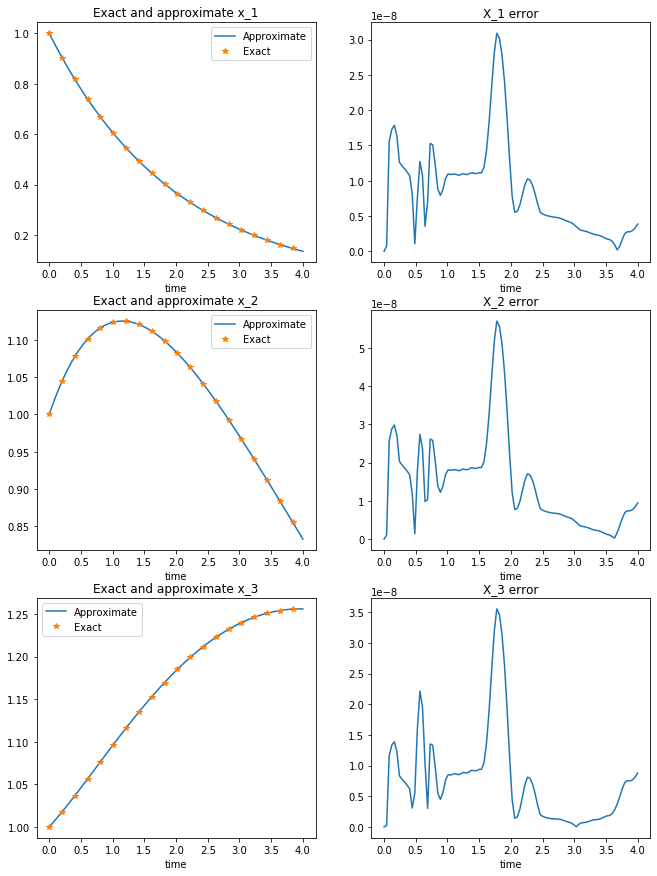

In [8]:
g1=np.exp(-t/2)
g2=-2*np.exp(-t/2)+3*np.exp(-t/4)
g3=1.5*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)
    
error1=abs(g1-x1_ode)
error2=abs(g2-x2_ode)
error3=abs(g3-x3_ode)

plt.figure(figsize=(11,15))
plt.subplot(3,2,1)
plt.plot(t,x1_ode)
plt.plot(t[::5],g1[::5],"*")
plt.title("Exact and approximate x_1")
plt.legend(["Approximate","Exact"])
plt.xlabel("time")
plt.subplot(3,2,2)
plt.plot(t,error1)
plt.title("X_1 error")
plt.xlabel("time")

plt.subplot(3,2,3)
plt.plot(t,x2_ode)
plt.plot(t[::5],g2[::5],"*")
plt.title("Exact and approximate x_2")
plt.legend(["Approximate","Exact"])
plt.xlabel("time")
plt.subplot(3,2,4)
plt.plot(t,error2)
plt.title("X_2 error")
plt.xlabel("time")

plt.subplot(3,2,5)
plt.plot(t,x3_ode)
plt.plot(t[::5],g3[::5],"*")
plt.title("Exact and approximate x_3")
plt.legend(["Approximate","Exact"])
plt.xlabel("time")
plt.subplot(3,2,6)
plt.plot(t,error3)
plt.title("X_3 error")
plt.xlabel("time")

$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [9]:
def EulerOdeSys(f,c,t):
    H=t[2]-t[1]
    N=len(t)
    M=len(c)
    t=np.linspace(a,b,N)
    z=np.zeros((N,M))
    z[0]=c
    for k in range (0,N-1):
        z[k+1]=z[k]+H*f(z[k],t[k])
    return z


     

        
        
    

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [10]:
def RK4OdeSys(f,c,t):
    H=t[2]-t[1]
    N=len(t)
    M=len(c)
    t=np.linspace(a,b,N)
    z=np.zeros((N,M))
    z[0]=c
    for k in range (0,N-1):
        k1=f(z[k],t[k])
        k2=f(z[k]+H*(k1/2),t[k]+H/2)
        k3=f(z[k]+H*(k2/2),t[k]+H/2)
        k4=f(z[k]+H*k3,t[k]+H)
        z[k+1]=z[k]+H/6*(k1+2*k2+2*k3+k4)
    return z


3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [12]:
c=z0
t=np.linspace(a,b,N)
z1=EulerOdeSys(f,c,t)
z2=RK4OdeSys(f,c,t)




4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

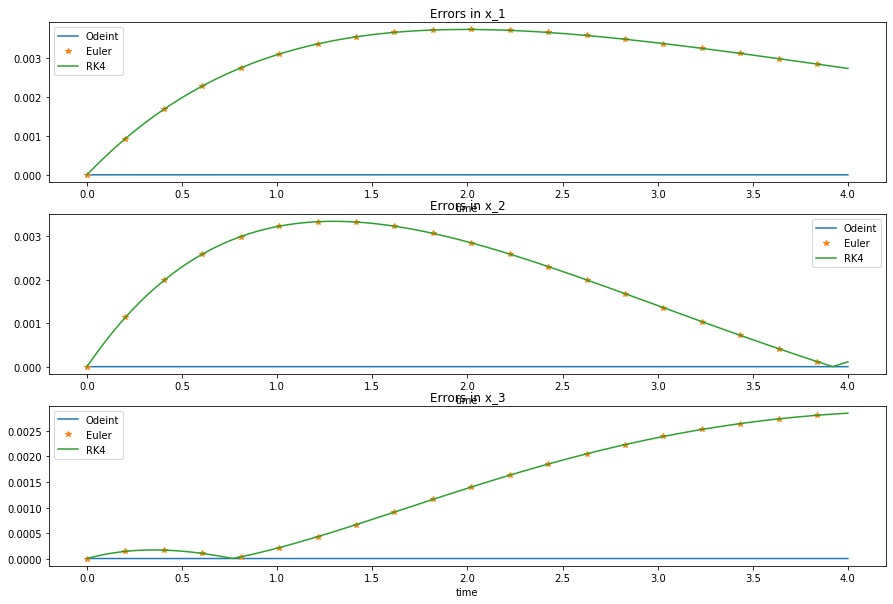

In [13]:
t=np.linspace(a,b,N)
z1=EulerOdeSys(f,c,t)
z2=RK4OdeSys(f,c,t)

x1_euler=z1[:,0]
x2_euler=z1[:,1]
x3_euler=z1[:,2]

x1_euler_e=abs(x1_euler-g1)
x2_euler_e=abs(x2_euler-g2)
x3_euler_e=abs(x3_euler-g3)

x1_Rk=z2[:,0]
x2_Rk=z2[:,1]
x3_Rk=z2[:,2]

x1_Rk_e=abs(x1_euler-g1)
x2_Rk_e=abs(x2_euler-g2)
x3_Rk_e=abs(x3_euler-g3)

plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(t,error1)
plt.plot(t[::5],x1_euler_e[::5],"*")
plt.plot(t,x1_Rk_e)
plt.title("Errors in x_1")
plt.xlabel("time")
plt.legend(["Odeint","Euler","RK4"])

plt.subplot(3,1,2)
plt.plot(t,error2)
plt.plot(t[::5],x2_euler_e[::5],"*")
plt.plot(t,x2_Rk_e)
plt.title("Errors in x_2")
plt.xlabel("time")
plt.legend(["Odeint","Euler","RK4"])

plt.subplot(3,1,3)
plt.plot(t,error3)
plt.plot(t[::5],x3_euler_e[::5],"*")
plt.plot(t,x3_Rk_e)
plt.title("Errors in x_3")
plt.xlabel("time")
plt.legend(["Odeint","Euler","RK4"])
